# Impulses

In [1]:
restoredefaultpath
set(0,'defaultlinelinewidth',1)
set(0,'defaultaxesfontsize',6)


ans =

    '9.7.0.1296695 (R2019b) Update 4'



In [2]:
%plot -s 800,400 -r 160 -f png

A step function in the forcing represents an effect that turns on and stays on. If we use a window function, the duration of the effect is limited. Now consider what happens if the window interval is $[T,T+\epsilon]$ and we let $\epsilon\to 0$.

If the forcing amplitude remains constant in this limit, then the total effect size must also go to zero. But if we let the forcing amplitude grow to keep the area under the curve constant, we simulate a fixed effect size acting at over an infinitesimally small window, i.e., a single instant. That reasoning motivates the following definition.

````{proof:definition} Impulse response, 1st order
Define

```{math}
:label: steps-spike
\delta_\epsilon(t-T) = \frac{H(t-T) - H(t - (T + \epsilon))}{\epsilon}.
```

As $\epsilon\to 0$, this becomes a tall, narrow spike at time $T$. Also let $x_\epsilon(t)$ be the solution of

```{math}
x' - a x = \delta_\epsilon(t), \quad x(0)=0.
```

Then the {term}`impulse response` of the linear operator $\mathcal{A}[x]=x'-ax$ is the function

```{math}
\lim_{\epsilon \to 0} x_\epsilon(t).
```
````

As a shorthand, we say that the impulse response is the solution of

```{math}
x' - a x = \delta(t), \quad x(0)=0,
```

where $\delta(t)$ is called an {term}`impulse` or a {term}`delta function`. 

```{note}
A math pedant will never fail to remind you that $\delta(t)$ is not a true function, but rather something called a *distribution*. Just nod at them and edge away slowly.
```

(section-steps-jump)=

## Impulse equals jump in value

It's not difficult to derive a formula for the impulse response when the coefficient $a$ in $\opA$ is constant. The solution to the window problem $x'-ax=\delta_\epsilon(t)$, $x(0)=0$ is

```{math}
x_\epsilon(t) = \frac{1}{a \epsilon} \left[  (e^{at}-1) - H(t-\epsilon) (e^{a(t-\epsilon)}-1) \right].
```

As $\epsilon\to 0$, we only care about what happens for $t> \epsilon$, which gives

```{math}
x_\epsilon(t) = \frac{e^{a t}}{a \epsilon}  \left( 1 - e^{-a\epsilon} \right), \quad (t > \epsilon).
```

Using L'Hôpital's Rule,

```{math}
\lim_{\epsilon\to 0} x_\epsilon(t) =e^{at} \left[ \lim_{\epsilon\to 0}  \frac{1 - e^{-a\epsilon}}{a \epsilon}\right] = e^{at}, \quad (t > 0).
```

This result, which generalizes to the case where $a$ depends on $t$, is worth stating in words as well as a formula.

```{proof:property}
In a first-order linear ODE, the effect of an impulse is the same as an instantaneous increase by 1 in the value of the solution.
```

```{note}
With step forcing, we stated that $x(t)$ is continuous while $x'(t)$ has jumps. For impulses, it's $x(t)$ itself that jumps. (These observations will be modified when we look at second-order problems.)
```

Applying superposition, we get the following.

````{proof:theorem} Impulse forcing, 1st order
The solution of 

$$
x'-a(t)x=f(t) + k \delta(t), \quad x(0)=x_0, 
$$

where $a(t)$ and $f(t)$ are continuous, also satisfies

```{math}
x'-a(t)x=f(t), \quad x(0)=x_0+k,
```

for $t>0$. 
````

## Solution method

It is relatively straightforward to apply superposition to solve particular examples with impulse forcing. To solve a problem in the form

$$
x'-a(t)x = f(t) + k \delta(t-T), \quad x(0)=x_0,
$$

where $T>0$ and $a(t)$ and $f(t)$ are continuous, we break the problem into manageable subproblems:

\begin{align*}
\opA[x_1] &= 0, \quad x_1(0)=x_0, \\
\opA[x_2] & = f(t), \quad x_2(0)=0,
\opA[x_3] & = \delta(t-T), \quad x_3(0)=0.
\end{align*}

By linearity, then, the solution we seek is $x=x_1+x_2+k x_3$. The problems for $x_1$ and $x_2$ are familiar and need no new commentary. As for $x_3$, for $0\le t < T$ we have $x'-ax = 0$, $x(0)=0$. The solution is clearly just $x_3(t)=0$ up to time $T$. At time $T$ the value jumps up by 1, and then the forcing is again zero. Thus, $x_3(t)=e^{a(t-T)}$ for $t\ge T$. We can express $x_3$ for all time as

:::{math}
:label: impulse-1st-solution
x_3(t) = H(t-T) e^{a(t-T)}.
:::

If the forcing of an IVP includes additional impulses, each contributes something like {eq}`impulse-1st-solution` to the solution.

::::{admonition} Example
:class: tip
Solve $x'+2x=3\delta(t-1)$, with $x(0)=-4$.

:::{dropdown} Solution
The homogeneous solution of $x'+2x=0$, $x(0)=-4$ is $x_1(t)=-4e^{-2t}$. From the impulse we get

$$
x' + 2x = \delta(t-1), \quad x(0)=0 \qquad \implies \qquad x_2(t) = H(t-1) e^{-2(t-1)}.
$$

Therefore, $x(t) = -4e^{-2t} + 3 H(t-1) e^{-2(t-1)}.$
:::
::::

## Numerical solution

The easiest way to solve these problems numerically is to solve the system first for $t<T$ and then for $t>T$, with the second solution having initial condition coming from the first. For the preceding example, we use:

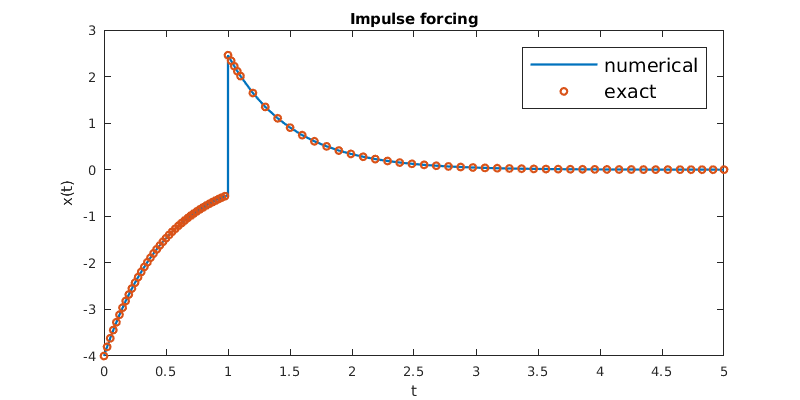

In [3]:
dxdt = @(t,x) -2*x;      % ODE without the delta
[t1,x1] = ode45(dxdt,[0,1],-4);
x2init = 3+x1(end);      % jump from the final value for x1
[t2,x2] = ode45(dxdt,[1,5],x2init);

t = [t1;t2];  x = [x1;x2];   % stack the time and solution vectors
x_exact = -4*exp(-2*t) + 3*(t>=1).*exp(-2*(t-1));
plot(t,x,'-',t,x_exact,'o','markersize',3)     
xlabel('t'), ylabel('x(t)')
legend('numerical','exact')
title('Impulse forcing')

The jump increase by 3 at $t=1$ is the only interruption to pure exponential decay.